# Predictive & Prescriptive Analytics


This use case is based on the Laser Seam Welding Scenario from AWL Techniek


<div>
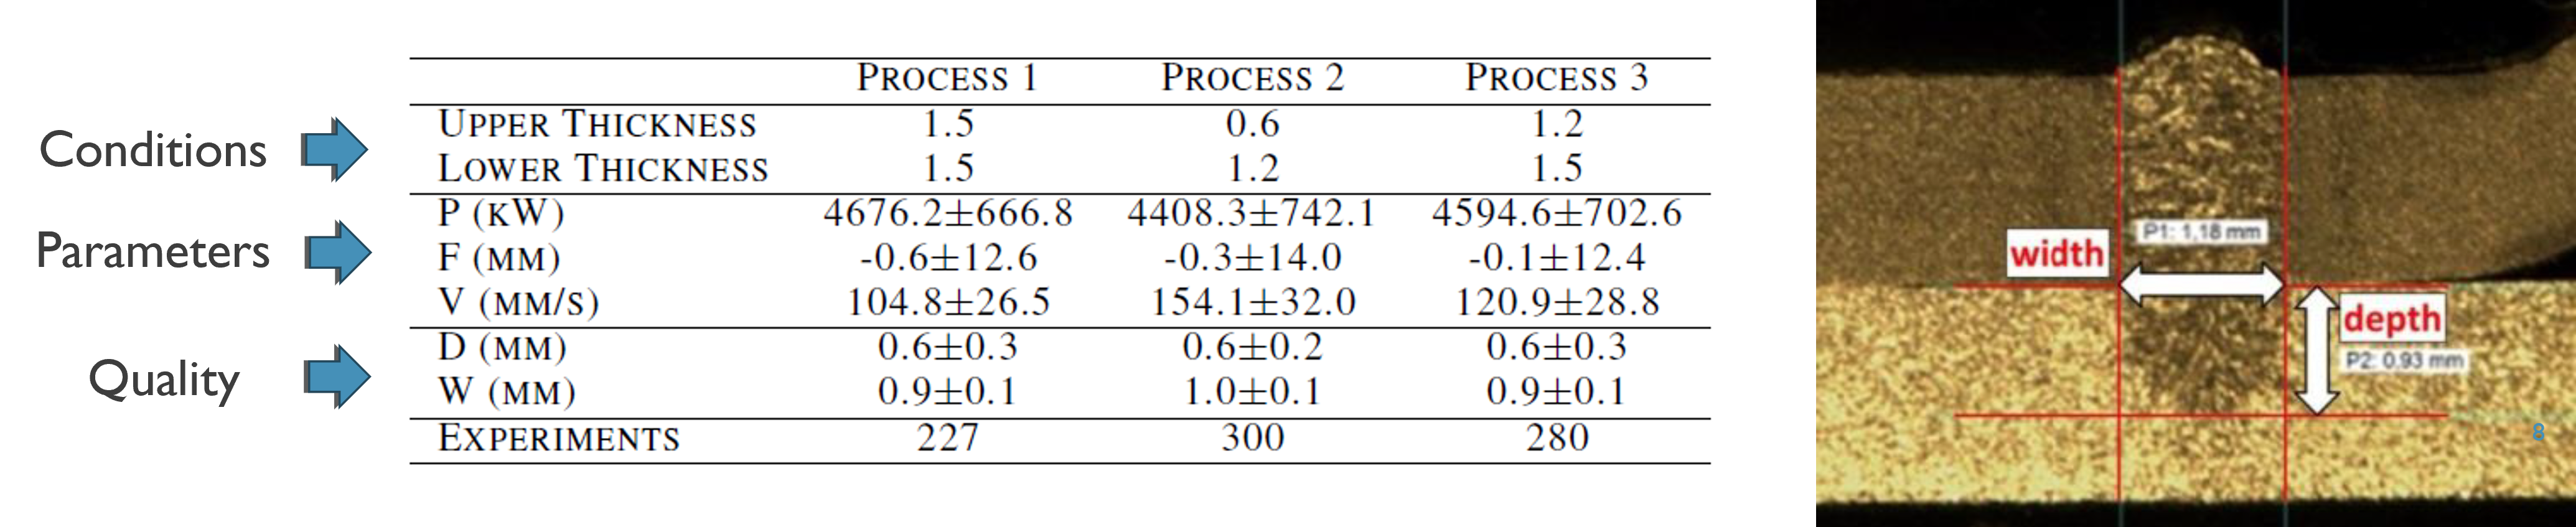
</div>

If some of these results or dataset is used, please consider citing the following publication:

    Reis, J., & Gonçalves, G. (2018, September). Laser Seam Welding optimization using Inductive Transfer Learning with Artificial Neural Networks. In 2018 IEEE 23rd International Conference on Emerging Technologies and Factory Automation (ETFA) (Vol. 1, pp. 646-653). IEEE.
    
    Reis, J., & Gonçalves, G. (2018). Process Modeling and Parameter Optimization for Machine Calibration in Smart Manufacturing for Laser Seam Welding. In The Seventh International Conference on Intelligent Systems and Applications (INTELLI). IARIA.

## Data import

Importing data from CSV files collected at the shop-floor. 

In [1]:
import numpy as np
from sklearn.externals import joblib
import pandas as pd

# Laser welding processes with different materials
dataset1 = 'DC04_HC380LA'
dataset2 = 'HC260LA_HC420LA'
dataset3 = 'HC420LA_HC380LA'
dataset_name = [dataset1,dataset2,dataset3]
dataset_path = "dataset/"
dataset_meta = ['power','focus','weld_velocity','penetration','weld_width']

np.set_printoptions(suppress=True)

#Load datasets
df_dc04 = pd.read_csv(dataset_path + dataset1 + "_no_keyhole.csv",delimiter=";")
df_hc260 = pd.read_csv(dataset_path + dataset2 + "_no_keyhole.csv",delimiter=";")
df_hc420 = pd.read_csv(dataset_path + dataset3 + "_no_keyhole.csv",delimiter=";")


#print('df_dc04 head: ' , df_dc04.head(10))
#print('df_hc260 head: ' , df_hc260.head(10))
#print('df_hc420 head: ' , df_hc420.head(10))

print('df_dc04 shape: ' , df_dc04.shape)
print('df_hc260 shape: ' , df_hc260.shape)
print('df_hc420 shape: ' , df_hc420.shape)



df_dc04 shape:  (188, 5)
df_hc260 shape:  (260, 5)
df_hc420 shape:  (220, 5)


## Data Visualization - Scatter Matrix Plot

DC04_HC380LA


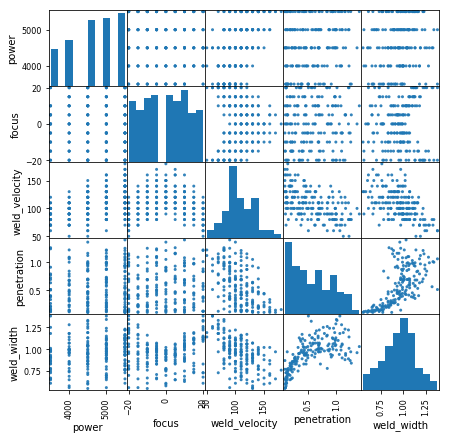

HC260LA_HC420LA


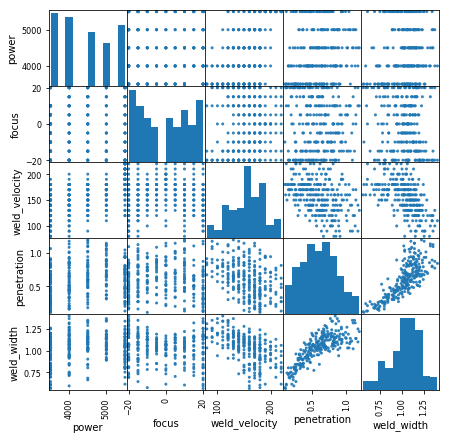

HC420LA_HC380LA


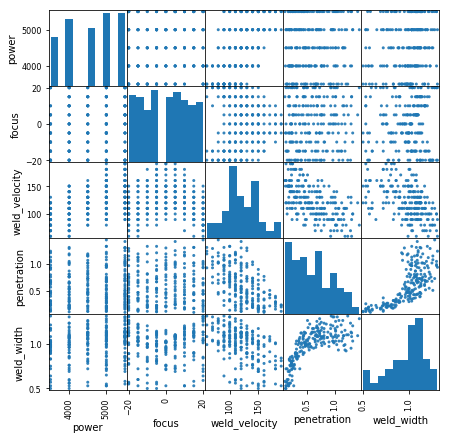

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,7)

print(dataset1)
pd.plotting.scatter_matrix(df_dc04, alpha=0.9)
plt.show()

print(dataset2)
pd.plotting.scatter_matrix(df_hc260, alpha=0.9)
plt.show()

print(dataset3)
pd.plotting.scatter_matrix(df_hc420, alpha=0.9)
plt.show()


## Data Visualization - 3D Scatter plot

<IPython.core.display.Javascript object>


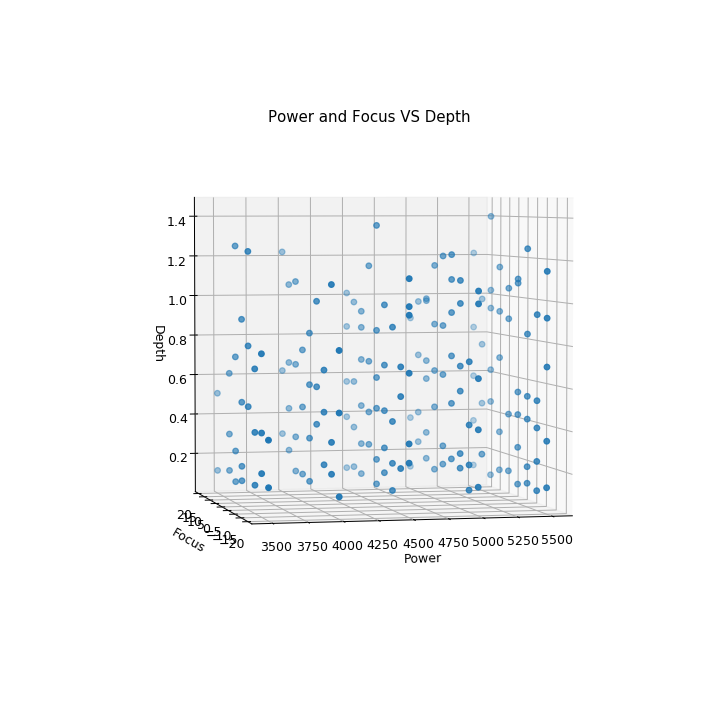

<IPython.core.display.Javascript object>


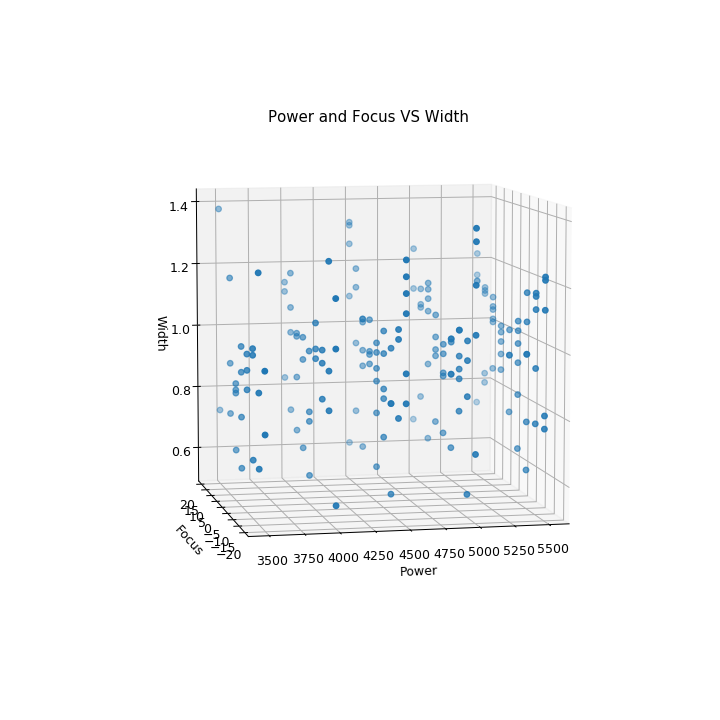

<IPython.core.display.Javascript object>


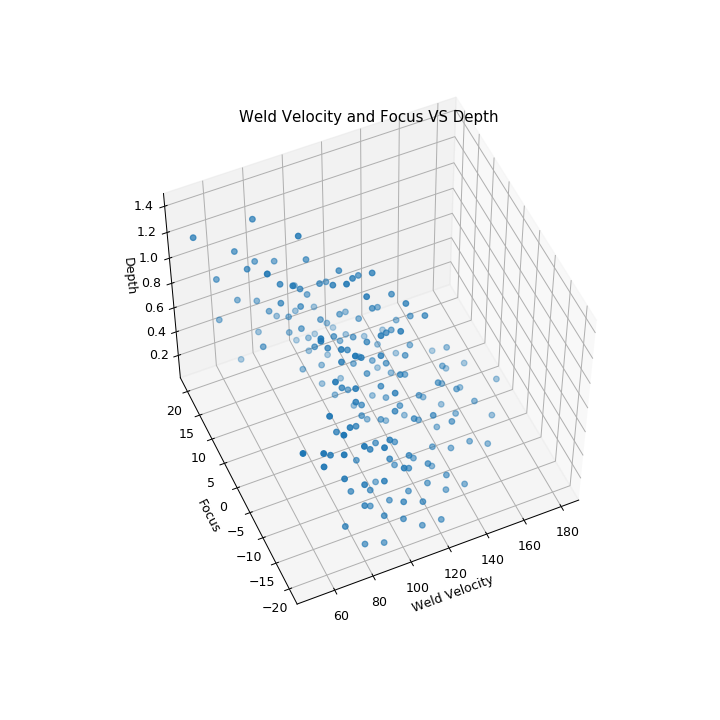

<IPython.core.display.Javascript object>


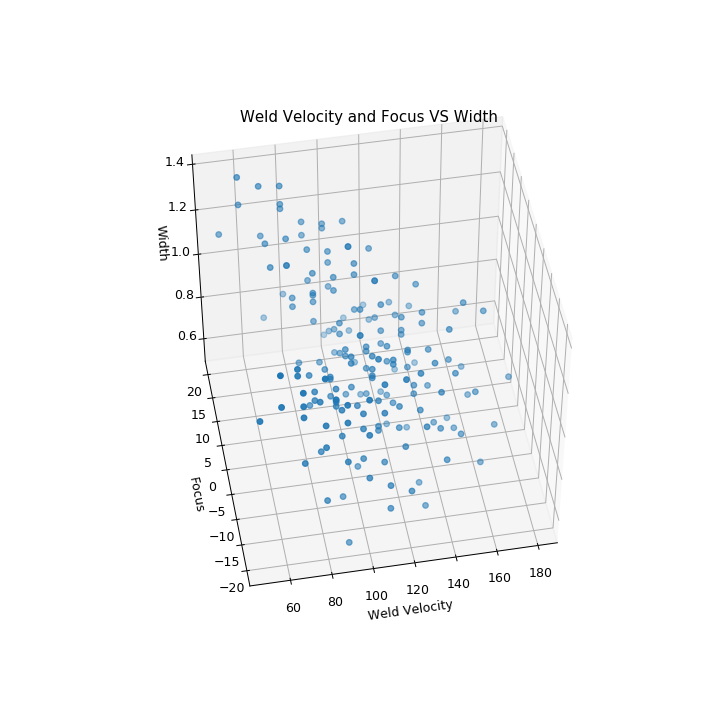

<IPython.core.display.Javascript object>


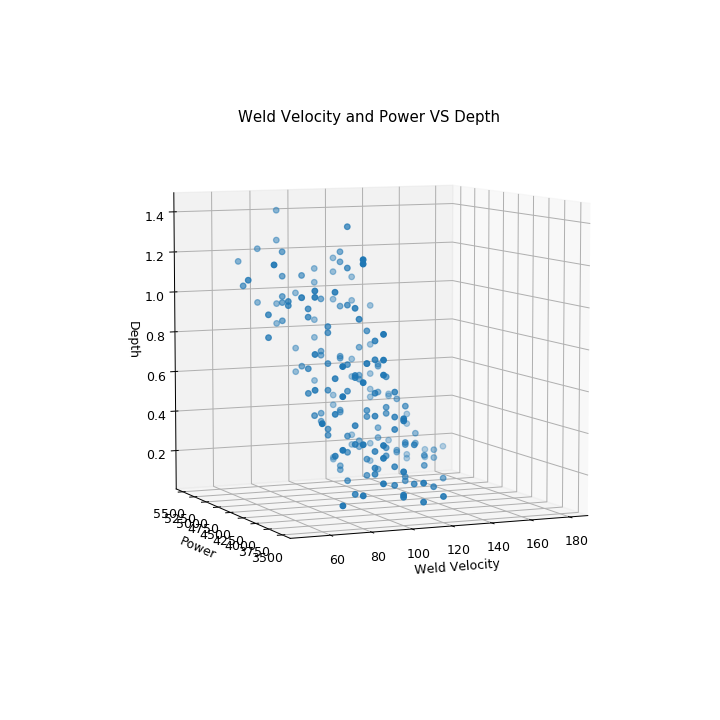

<IPython.core.display.Javascript object>


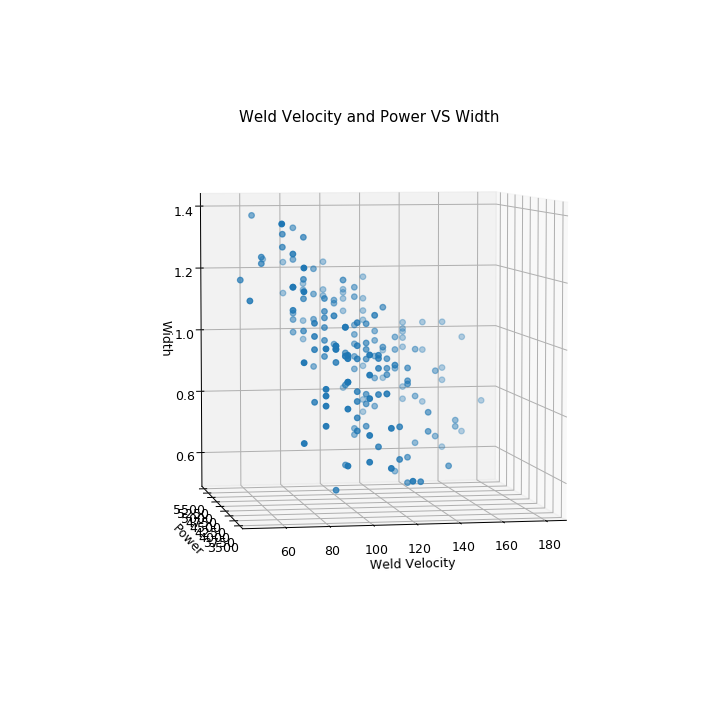

In [24]:

################################################################
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8,8)

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["power"]].values, df_dc04[["focus"]].values, df_dc04[["penetration"]].values)
ax.set_title("Power and Focus VS Depth")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["power"]].values, df_dc04[["focus"]].values, df_dc04[["weld_width"]].values)
ax.set_title("Power and Focus VS Width")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")








##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["focus"]].values, df_dc04[["penetration"]].values)
ax.set_title("Weld Velocity and Focus VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["focus"]].values, df_dc04[["weld_width"]].values)
ax.set_title("Weld Velocity and Focus VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")






##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["power"]].values, df_dc04[["penetration"]].values)
ax.set_title("Weld Velocity and Power VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Depth")

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["power"]].values, df_dc04[["weld_width"]].values)
ax.set_title("Weld Velocity and Power VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Width")


plt.show()

## Data Visualization - Heatmap

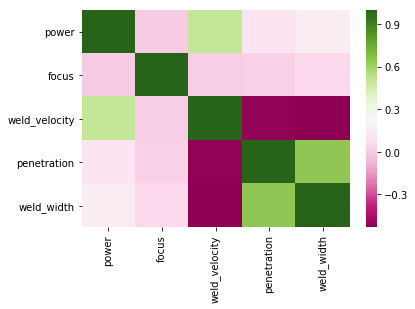

In [25]:
%matplotlib inline
import seaborn as sns

corr = df_dc04.corr()

sns.heatmap(corr, cmap="PiYG")

plt.show()

# Outlier detection

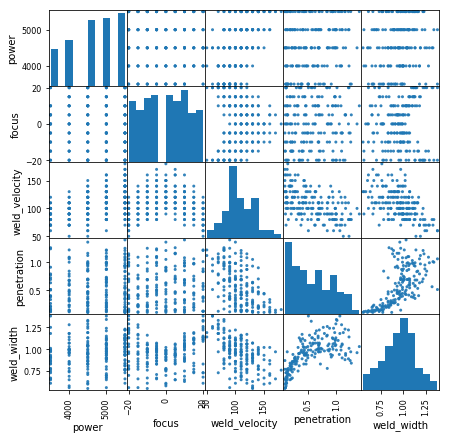

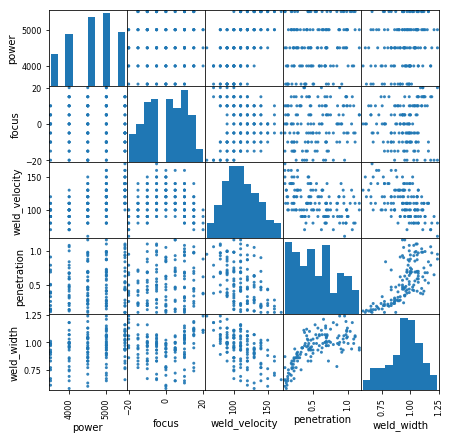

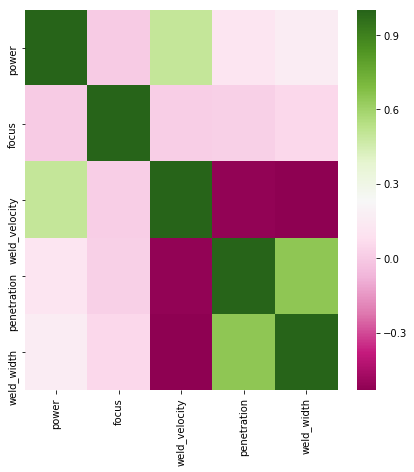

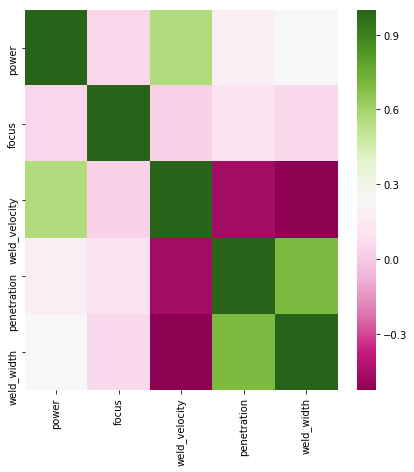

Original shape:  (188, 5)
Resulting shape:  (188, 5)


In [5]:
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#############################################
clf = EllipticEnvelope(contamination=0.261)
#clf = OneClassSVM(nu=0.261, gamma=0.05)
#clf = EllipticEnvelope(support_fraction=1., contamination=0.4)

clf.fit(df_dc04)
out = clf.predict(df_dc04)
labels = np.where(out == -1)

# create a new version of the dataset with filtered data
df_dc04_filt = df_dc04.drop(df_dc04.index[labels[0]])


#############################################
# Scatter matrix plot for unfiltered data
plt.rcParams["figure.figsize"] = (7,7)
pd.plotting.scatter_matrix(df_dc04, alpha=0.9)
plt.show()

#############################################
# Scatter matrix plot for filtered data
plt.rcParams["figure.figsize"] = (7,7)
pd.plotting.scatter_matrix(df_dc04_filt, alpha=0.9)
plt.show()


#############################################
# Correlation matrix for unfiltered data
corr = df_dc04.corr()
sns.heatmap(corr, cmap="PiYG")
plt.show()

#############################################
# Correlation matrix for filtered data
corr = df_dc04_filt.corr()
sns.heatmap(corr, cmap="PiYG")
plt.show()



#############################################
# Assuming outlier removal
print("Original shape: " , df_dc04.shape)
#df_dc04 = df_dc04_filt
print("Resulting shape: " , df_dc04.shape)

# Data Normalization

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


min_max_scaler_x = preprocessing.MinMaxScaler()
X = df_dc04[["power", "focus", "weld_velocity"]].values
X_norm = min_max_scaler_x.fit_transform(X)

min_max_scaler_y = preprocessing.MinMaxScaler()
Y = df_dc04[["penetration", "weld_width"]].values
Y_norm = min_max_scaler_y.fit_transform(Y)

# Train & Testing

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size=0.1, random_state=0)
print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , Y_train.shape)
print("y_test:" , Y_test.shape)



# define base model
def baseline_model():
    # create model
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer="uniform", activation="sigmoid", input_dim = 3))
    classifier.add(Dense(units = 10, kernel_initializer="uniform", activation="sigmoid"))
    classifier.add(Dense(units = 2, kernel_initializer="uniform", activation="linear"))
    
    classifier.compile(loss='mean_squared_error', optimizer='adam')
    
    return classifier


##############################
# One
'''
estimator = KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=100, verbose=0)
estimator.fit(X_norm, Y_norm)
'''


'''
##############################
# Pipeline
estimators = []
#estimators.append(('standardize', preprocessing.MinMaxScaler()))
estimators.append(("mlp4",KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=5)
results = cross_val_score(pipeline, X_norm, Y_norm, cv=kfold)
print("Standardize: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''


##############################
# GridSearch
import multiprocessing
n_cpus = multiprocessing.cpu_count()

param_grid = {
    'epochs': [100, 200, 500, 1000],
    'batch_size': [50, 100, 200, 500]
}

model = KerasRegressor(build_fn=baseline_model, verbose=0)
grid_search = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    n_jobs=1, 
                    cv=5,
                    verbose=3,
                    scoring='neg_mean_squared_error',
                    refit=True)

grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

estimator = grid_search

print("MSE for test set: " , mean_squared_error(Y_test, grid_search.predict(X_test)))


Using TensorFlow backend.


X_train: (169, 3)
X_test: (19, 3)
y_train: (169, 2)
y_test: (19, 2)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] batch_size=50, epochs=100 .......................................
Instructions for updating:
keep_dims is deprecated, use keepdims instead
[CV]  batch_size=50, epochs=100, score=-0.054548411062891995, total=   1.7s
[CV] batch_size=50, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  batch_size=50, epochs=100, score=-0.0597245750498233, total=   1.4s
[CV] batch_size=50, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  batch_size=50, epochs=100, score=-0.06695357282933478, total=   1.6s
[CV] batch_size=50, epochs=100 .......................................
[CV]  batch_size=50, epochs=100, score=-0.04844874758540145, total=   1.6s
[CV] batch_size=50, epochs=100 .......................................
[CV]  batch_size=50, epochs=100, score=-0.054134333776533046, total=   1.8s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.0544074367209259, total=   2.4s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.059268898092026547, total=   2.2s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.06603029936196424, total=   2.3s
[CV] batch_size=50, epochs=200 .......................................
[CV]  batch_size=50, epochs=200, score=-0.04786985995293235, total=   2.9s
[CV] batch_size=50, epochs=200 .................

[CV]  batch_size=200, epochs=1000, score=-0.0460292088892624, total=   6.1s
[CV] batch_size=200, epochs=1000 .....................................
[CV]  batch_size=200, epochs=1000, score=-0.051703617446930666, total=   5.9s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.05421488170289468, total=   3.2s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.06009122729156718, total=   3.2s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.06850174724008028, total=   3.3s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.048442194656304526, total=   3.3s
[CV] batch_size=500, epochs=100 ......................................
[CV]  batch_size=500, epochs=100, score=-0.05447078887628945, total=   3.4s
[CV] batch_size=500, epochs=200 .......

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.9min finished


Best: -0.032821 using {'batch_size': 50, 'epochs': 1000}
-0.056777 (0.006237) with: {'batch_size': 50, 'epochs': 100}
-0.056245 (0.006107) with: {'batch_size': 50, 'epochs': 200}
-0.051257 (0.005261) with: {'batch_size': 50, 'epochs': 500}
-0.032821 (0.004872) with: {'batch_size': 50, 'epochs': 1000}
-0.057070 (0.006369) with: {'batch_size': 100, 'epochs': 100}
-0.056519 (0.006216) with: {'batch_size': 100, 'epochs': 200}
-0.054577 (0.005775) with: {'batch_size': 100, 'epochs': 500}
-0.040841 (0.005853) with: {'batch_size': 100, 'epochs': 1000}
-0.056911 (0.006290) with: {'batch_size': 200, 'epochs': 100}
-0.056915 (0.006299) with: {'batch_size': 200, 'epochs': 200}
-0.056314 (0.006153) with: {'batch_size': 200, 'epochs': 500}
-0.054065 (0.005433) with: {'batch_size': 200, 'epochs': 1000}
-0.057160 (0.006786) with: {'batch_size': 500, 'epochs': 100}
-0.056907 (0.006276) with: {'batch_size': 500, 'epochs': 200}
-0.056265 (0.006146) with: {'batch_size': 500, 'epochs': 500}
-0.054087 (0.0

'\nprint("Fitting the whole dataset with best parameters....")\nestimator = KerasRegressor(build_fn=baseline_model, verbose=0)\nestimator.set_params(**grid_search.best_params_)\nestimator.fit(X_train, Y_train)\n'

# Model Prediction - MSE Histogram

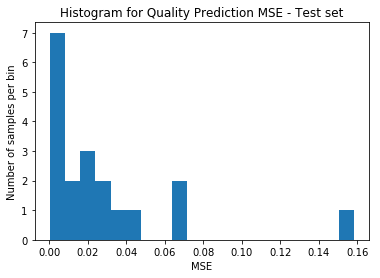

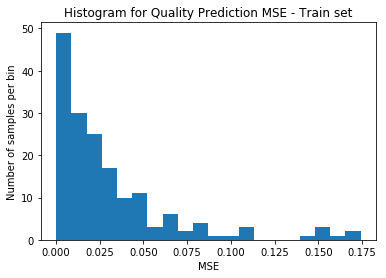

In [34]:
##########################################################
# Test set
all_res_predict = []

for i in range(Y_test.shape[0]):
    all_res_predict.append(mean_squared_error(Y_test[i], grid_search.predict(np.matrix(X_test[i]))))

plt.hist(all_res_predict, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE - Test set")
plt.show()

###########################################################
# Train set
all_res_predict = []

for i in range(Y_train.shape[0]):
    all_res_predict.append(mean_squared_error(Y_train[i], grid_search.predict(np.matrix(X_train[i]))))

plt.hist(all_res_predict, bins = 20)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE - Train set")
plt.show()

# Model Prediction - Visualization 2D

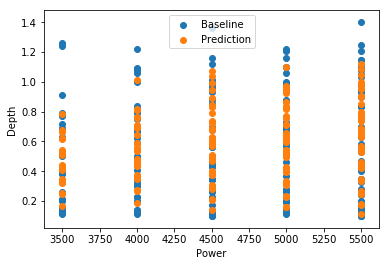

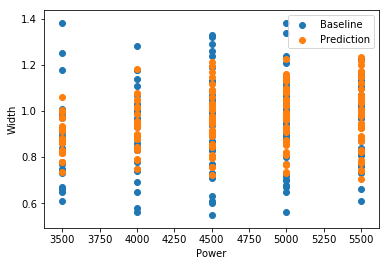

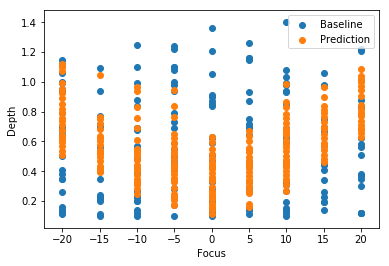

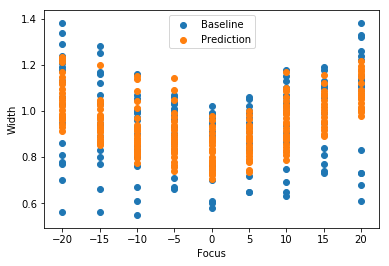

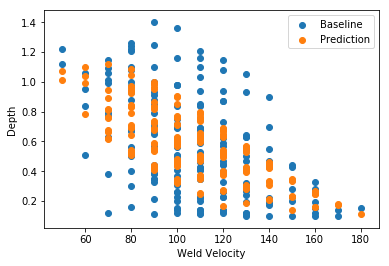

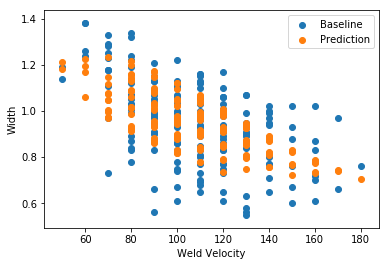

In [8]:
%matplotlib inline

pred_norm = estimator.predict(X_norm)
pred_denorm = min_max_scaler_y.inverse_transform(pred_norm)
pred_pd = pd.DataFrame(pred_denorm, columns=[dataset_meta[3:]])

plt.scatter(df_dc04[["power"]].values, df_dc04[["penetration"]].values, label="Baseline")
plt.scatter(df_dc04[["power"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Power")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(df_dc04[["power"]].values, df_dc04[["weld_width"]].values, label="Baseline")
plt.scatter(df_dc04[["power"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Power")
plt.ylabel("Width")
plt.legend()
plt.show()


plt.scatter(df_dc04[["focus"]].values, df_dc04[["penetration"]].values, label="Baseline")
plt.scatter(df_dc04[["focus"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Focus")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(df_dc04[["focus"]].values, df_dc04[["weld_width"]].values, label="Baseline")
plt.scatter(df_dc04[["focus"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Focus")
plt.ylabel("Width")
plt.legend()
plt.show()

plt.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["penetration"]].values, label="Baseline")
plt.scatter(df_dc04[["weld_velocity"]].values, pred_pd[["penetration"]].values, label="Prediction")
plt.xlabel("Weld Velocity")
plt.ylabel("Depth")
plt.legend()
plt.show()

plt.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["weld_width"]].values, label="Baseline")
plt.scatter(df_dc04[["weld_velocity"]].values, pred_pd[["weld_width"]].values, label="Prediction")
plt.xlabel("Weld Velocity")
plt.ylabel("Width")
plt.legend()
plt.show()

# Model Prediction - Visualization 3D

<IPython.core.display.Javascript object>


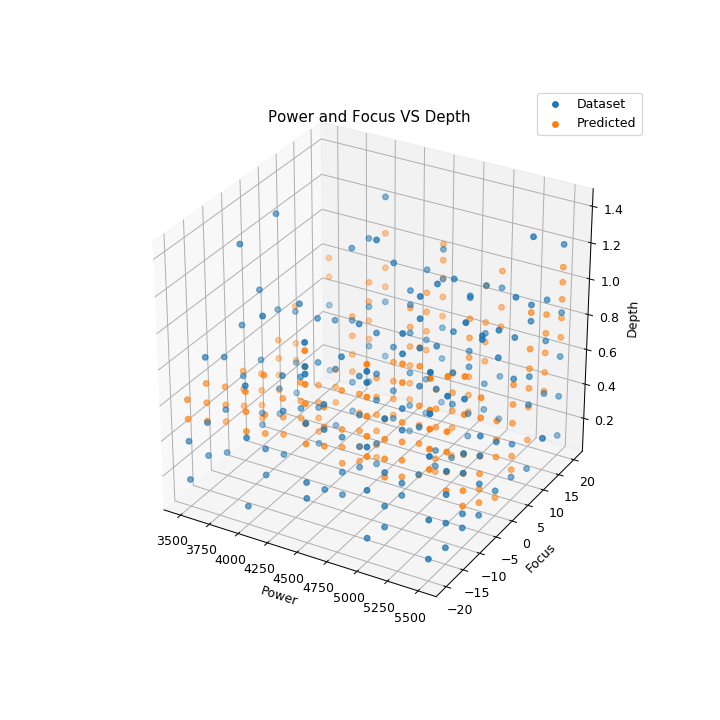

<IPython.core.display.Javascript object>


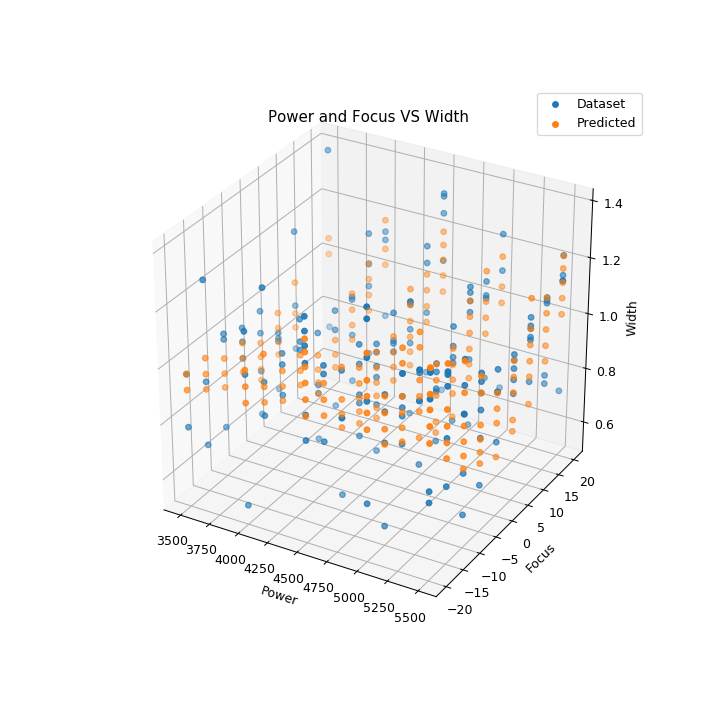

<IPython.core.display.Javascript object>


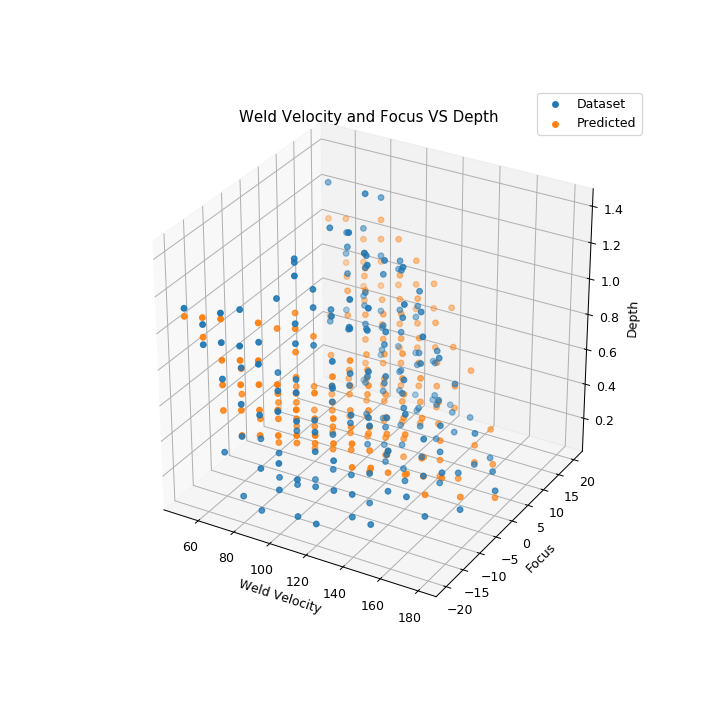

<IPython.core.display.Javascript object>


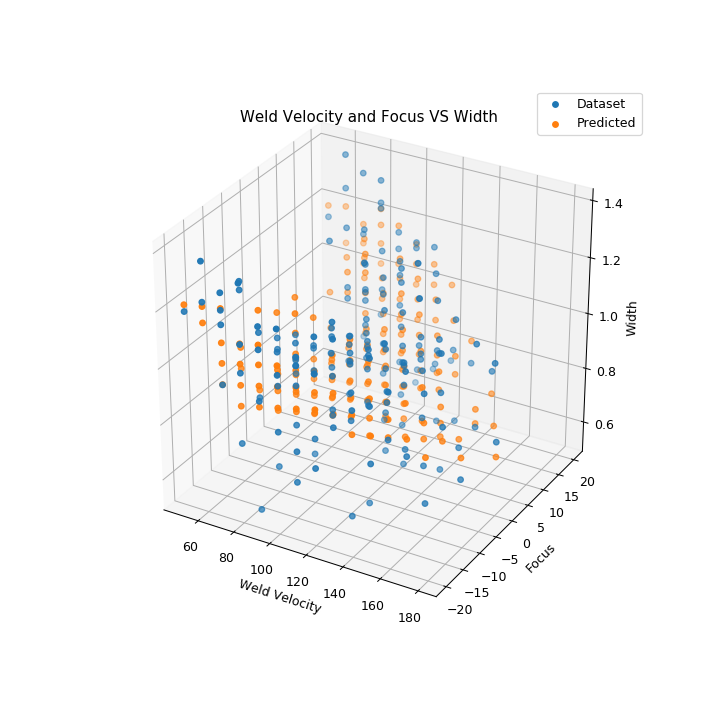

<IPython.core.display.Javascript object>


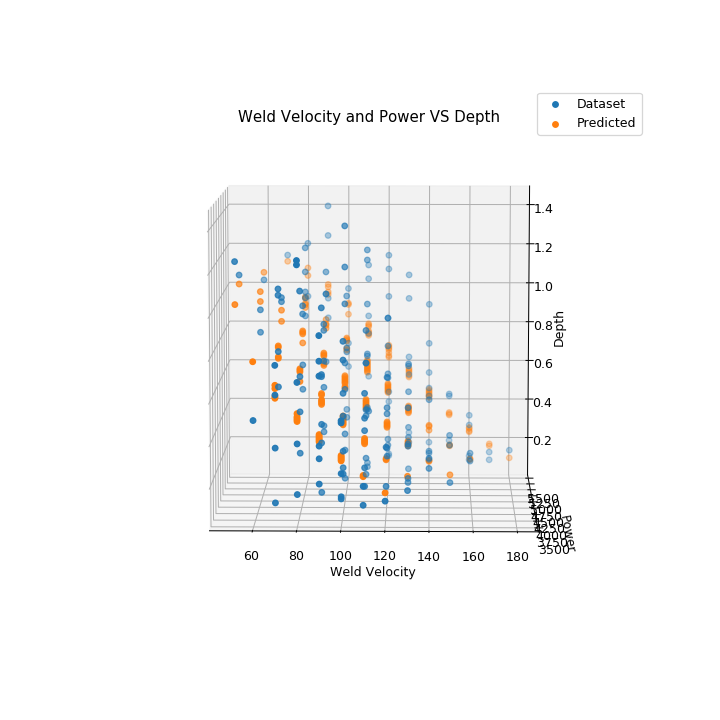

<IPython.core.display.Javascript object>


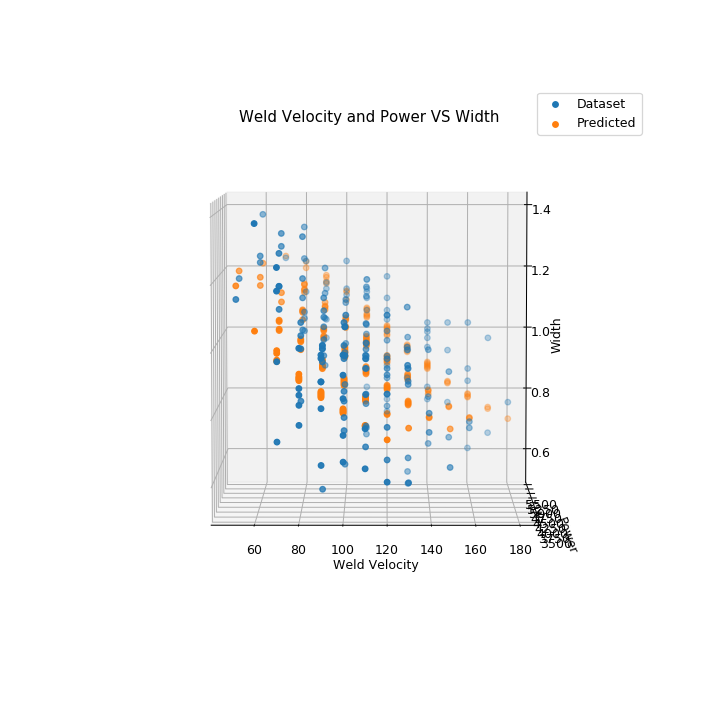

In [26]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (8,8)

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["power"]].values, df_dc04[["focus"]].values, df_dc04[["penetration"]].values, label="Dataset")
ax.scatter(df_dc04[["power"]].values, df_dc04[["focus"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Power and Focus VS Depth")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["power"]].values, df_dc04[["focus"]].values, df_dc04[["weld_width"]].values, label="Dataset")
ax.scatter(df_dc04[["power"]].values, df_dc04[["focus"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Power and Focus VS Width")
ax.set_xlabel("Power")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")
ax.legend()







##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["focus"]].values, df_dc04[["penetration"]].values, label="Dataset")
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["focus"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Weld Velocity and Focus VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["focus"]].values, df_dc04[["weld_width"]].values, label="Dataset")
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["focus"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Weld Velocity and Focus VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Focus")
ax.set_zlabel("Width")
ax.legend()









##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["power"]].values, df_dc04[["penetration"]].values, label="Dataset")
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["power"]].values, pred_pd[["penetration"]].values, label="Predicted")
ax.set_title("Weld Velocity and Power VS Depth")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Depth")
ax.legend()

##################################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["power"]].values, df_dc04[["weld_width"]].values, label="Dataset")
ax.scatter(df_dc04[["weld_velocity"]].values, df_dc04[["power"]].values, pred_pd[["weld_width"]].values, label="Predicted")
ax.set_title("Weld Velocity and Power VS Width")
ax.set_xlabel("Weld Velocity")
ax.set_ylabel("Power")
ax.set_zlabel("Width")
ax.legend()


plt.show()

# Meta-heuristics Parameter Estimation

In [28]:
%matplotlib inline

from scipy.optimize import minimize, basinhopping
from random import randint
from scipy.optimize import dual_annealing
import math
import matplotlib.pyplot as plt
all_results = []
all_estimations = []

def mse_calc(x_values):
    return math.sqrt(mean_squared_error(estimator.predict(np.matrix(x_values)), target))

def callbackF(x_values, f, context):
    global iteration
    print("Iteration: {0}, Estimation: {1}, MSE: {2}".format(iteration, x_values, mse_calc(x_values)))
    iteration += 1
    
for sample_i in range(X_test.shape[0]):
    
    iteration = 1

    print("X norm: " , X_test[sample_i])
    print("Y norm: " , Y_test[sample_i])

    target = Y_test[sample_i]

    print("Target: " , target)

    # Initial guess [0]
    x0 = [0] * X_test.shape[1]
    bnds = ((0, 1), (0, 1), (0, 1))
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bnds}


    ###########################################################
    # Optimization
    #res = basinhopping(mse_calc, x0, minimizer_kwargs=minimizer_kwargs, niter=20000, niter_success=1000, T=10)
    res = minimize(mse_calc, x0, method='nelder-mead',options={'xatol': 1e-15, 'disp': True, 'fatol': 1e-15})
    '''
    res = dual_annealing(mse_calc,
                         bounds=bnds,
                         #callback=callbackF,
                         restart_temp_ratio = 0.01,
                         initial_temp = 10000)
    '''

    estimation = res.x
    prediction = estimator.predict(np.matrix(estimation))

    mse_estimation = mean_squared_error(estimation, X_test[sample_i])
    mse_prediction = mean_squared_error(prediction, target)
    
    print("Estimated parameters (X norm): " , estimation , X_test[sample_i], " MSE: " , mse_estimation)
    print("Closest quality prediction (Y norm): " , prediction , target, " MSE: " , mse_prediction)

    print("Estimated parameters (X): " , min_max_scaler_x.inverse_transform(np.matrix(estimation)) , min_max_scaler_x.inverse_transform(np.matrix(X_test[sample_i])))
    print("Closest quality prediction (Y): " , min_max_scaler_y.inverse_transform(np.matrix(prediction)), min_max_scaler_y.inverse_transform(np.matrix(target)))
    
    print("Iteration " , sample_i , " out of " , X_test.shape[0])
    
    all_results.append(mse_prediction)
    all_estimations.append(mse_estimation)


X norm:  [0.         0.625      0.23076923]
Y norm:  [0.89230769 0.34939759]
Target:  [0.89230769 0.34939759]
Optimization terminated successfully.
         Current function value: 0.309048
         Iterations: 82
         Function evaluations: 265
Estimated parameters (X norm):  [ 0.02124899  0.00539227 -0.03791816] [0.         0.625      0.23076923]  MSE:  0.15218605650251799
Closest quality prediction (Y norm):  [0.61411387 0.686487  ] [0.89230769 0.34939759]  MSE:  0.09551054361181877
Estimated parameters (X):  [[3542.49797293  -19.78430903   45.07063864]] [[3500.    5.   80.]]
Closest quality prediction (Y):  [[0.89834803 1.1197842 ]] [[1.26 0.84]]
Iteration  0  out of  19
X norm:  [1.         0.375      0.92307692]
Y norm:  [0.         0.13253012]
Target:  [0.         0.13253012]
Optimization terminated successfully.
         Current function value: 0.026675
         Iterations: 104
         Function evaluations: 305
Estimated parameters (X norm):  [-0.55129227 -0.08611733  0.419

Optimization terminated successfully.
         Current function value: 0.073077
         Iterations: 93
         Function evaluations: 281
Estimated parameters (X norm):  [-0.18719694 -0.02919783  0.14207138] [0.25       0.875      0.30769231]  MSE:  0.34538172223994756
Closest quality prediction (Y norm):  [0.32714134 0.45026565] [0.26153846 0.53012048]  MSE:  0.005340266541585056
Estimated parameters (X):  [[3125.60611186  -21.16791304   68.46927998]] [[4000.   15.   90.]]
Closest quality prediction (Y):  [[0.52528375 0.9237205 ]] [[0.44 0.99]]
Iteration  12  out of  19
X norm:  [0.25       0.125      0.15384615]
Y norm:  [0.76153846 0.87951807]
Target:  [0.76153846 0.87951807]
Optimization terminated successfully.
         Current function value: 0.038645
         Iterations: 92
         Function evaluations: 284
Estimated parameters (X norm):  [ 0.11676244  0.030352   -0.21157821] [0.25       0.125      0.15384615]  MSE:  0.05341515411425771
Closest quality prediction (Y norm):  [0

# Histogram plot for Quality Prediction and Parameter Estimation

One of the concerns to have once performing machine parameter estimation is to look for the correct information. If you only look for MSE coming from the optimization method, in other words, the difference between the defined target and predicted Y from the meta-heuristic algorithm, you can only conclude that the algorithm used can converge towards a minimum. However, the minimum in terms of different between target and predicted Y might not yield a good machine parameter estimation because different machine parameters X might result in the same, or close, quality prediction Y.

Thus, the correct way to interpret the results and understand if the implemented strategy can be used in production is to assess the MSE of the machine parameter estimation against the ground truth. This way, a histogram should be plotted to understand if the strategy will yield good results in the future.

## Why not using the machine parameters in the loss function?

This should not be the case because in a real situation the customer will provide you with the target quality, and you should only use this information to provide a machine parameter estimation.

Quality Prediction Mean and STD,  0.01032355726767668 0.0228992180859534
Parameter Estimation Mean and STD,  0.37492221529016034 0.23468192982144295


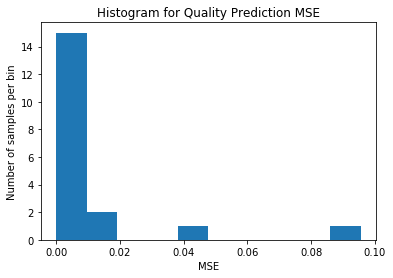

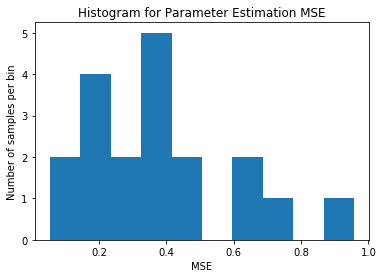

In [11]:
import statistics 

print("Quality Prediction Mean and STD, " , statistics.mean(all_results), statistics.stdev(all_results))
print("Parameter Estimation Mean and STD, " , statistics.mean(all_estimations), statistics.stdev(all_estimations))

plt.hist(all_results, bins = 10)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE")
plt.show()

plt.hist(all_estimations, bins = 10)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Parameter Estimation MSE")
plt.show()

# Better strategy for optimization?

The playbook strategy is based on declaring the initial guess of the optimization method to shorten the search space for optimal or near-optimal solutions. In sum, this strategy finds the machine parameters used in the past the yielded the closest quality prediction. This way, instead of starting with a random or zero array as an initial guess, the algorithm will 'de facto' start with an initial guess. In some cases this might not be true, but the rational for this strategy is that similar product qualities should have similar machine parameters. 

In [12]:
%matplotlib inline

from scipy.optimize import minimize, basinhopping
from random import randint
from scipy.optimize import dual_annealing
import math
import matplotlib.pyplot as plt
all_results_opt = []
all_estimations_opt = []

def mse_calc(x_values):
    return math.sqrt(mean_squared_error(estimator.predict(np.matrix(x_values)), target))

def callbackF(x_values, f, context):
    global iteration
    print("Iteration: {0}, Estimation: {1}, MSE: {2}".format(iteration, x_values, mse_calc(x_values)))
    iteration += 1
    
    
def find_closest_parameter():
    global target
    minimum = 9999
    index = -1
    for i in range(Y_train.shape[0]):
        diff = sum(abs(target-Y_train[i]))
        if diff < minimum:
            minimum = diff
            index = i
    return index
    
for sample_i in range(X_test.shape[0]):
    
    iteration = 1

    print("X norm: " , X_test[sample_i])
    print("Y norm: " , Y_test[sample_i])

    target = Y_test[sample_i]

    print("Target: " , target)

    # Initial guess
    c = find_closest_parameter()
    if c == -1:
        x0 = [0] * X_train.shape[1]
    else:
        x0 = X_train[c]
        
    print("Closest from training set: " , Y_train[c] , target)
    bnds = ((0, 1), (0, 1), (0, 1))
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bnds}


    ###########################################################
    # Optimization
    #res = basinhopping(mse_calc, x0, minimizer_kwargs=minimizer_kwargs, niter=20000, niter_success=1000, T=10)
    res = minimize(mse_calc, x0, method='nelder-mead',options={'xatol': 1e-15, 'disp': True, 'fatol': 1e-15})
    '''
    res = dual_annealing(mse_calc,
                         bounds=bnds,
                         #callback=callbackF,
                         restart_temp_ratio = 0.01,
                         initial_temp = 10000)
    '''
    
    estimation = res.x
    prediction = estimator.predict(np.matrix(estimation))

    mse_estimation = mean_squared_error(estimation, X_test[sample_i])
    mse_prediction = mean_squared_error(prediction, target)
    
    print("Estimated parameters (X norm): " , estimation , X_test[sample_i], " MSE: " , mse_estimation)
    print("Closest quality prediction (Y norm): " , prediction , target, " MSE: " , mse_prediction)

    print("Estimated parameters (X): " , min_max_scaler_x.inverse_transform(np.matrix(estimation)) , min_max_scaler_x.inverse_transform(np.matrix(X_test[sample_i])))
    print("Closest quality prediction (Y): " , min_max_scaler_y.inverse_transform(np.matrix(prediction)), min_max_scaler_y.inverse_transform(np.matrix(target)))
    
    print("Iteration " , sample_i , " out of " , X_test.shape[0])
    
    all_results_opt.append(mse_prediction)
    all_estimations_opt.append(mse_estimation)


X norm:  [0.         0.625      0.23076923]
Y norm:  [0.89230769 0.34939759]
Target:  [0.89230769 0.34939759]
Closest from training set:  [0.87692308 0.38554217] [0.89230769 0.34939759]
Optimization terminated successfully.
         Current function value: 0.309047
         Iterations: 93
         Function evaluations: 283
Estimated parameters (X norm):  [ 0.00096957  0.60651658 -0.02044428] [0.         0.625      0.23076923]  MSE:  0.02115026799230962
Closest quality prediction (Y norm):  [0.61401373 0.6864028 ] [0.89230769 0.34939759]  MSE:  0.0955100192029869
Estimated parameters (X):  [[3501.93914877    4.26066313   47.34224385]] [[3500.    5.   80.]]
Closest quality prediction (Y):  [[0.89821786 1.1197143 ]] [[1.26 0.84]]
Iteration  0  out of  19
X norm:  [1.         0.375      0.92307692]
Y norm:  [0.         0.13253012]
Target:  [0.         0.13253012]
Closest from training set:  [0.01538462 0.15662651] [0.         0.13253012]
Optimization terminated successfully.
         Curre

Optimization terminated successfully.
         Current function value: 0.040193
         Iterations: 79
         Function evaluations: 256
Estimated parameters (X norm):  [1.08146517 0.39392184 0.68723486] [0.5        0.625      0.53846154]  MSE:  0.1378774527134621
Closest quality prediction (Y norm):  [0.2976541 0.4259869] [0.26153846 0.46987952]  MSE:  0.001615450967122589
Estimated parameters (X):  [[5662.9303381    -4.2431262   139.34053196]] [[4500.    5.  120.]]
Closest quality prediction (Y):  [[0.4869503 0.9035691]] [[0.44 0.94]]
Iteration  11  out of  19
X norm:  [0.25       0.875      0.30769231]
Y norm:  [0.26153846 0.53012048]
Target:  [0.26153846 0.53012048]
Closest from training set:  [0.25384615 0.5060241 ] [0.26153846 0.53012048]
Optimization terminated successfully.
         Current function value: 0.073103
         Iterations: 81
         Function evaluations: 265
Estimated parameters (X norm):  [1.05744742 0.26448026 0.6446864 ] [0.25       0.875      0.30769231]  M

Quality Prediction Mean and STD,  0.01032429135861924 0.022899620988482982
Parameter Estimation Mean and STD,  0.16183960899212158 0.1273530275244181


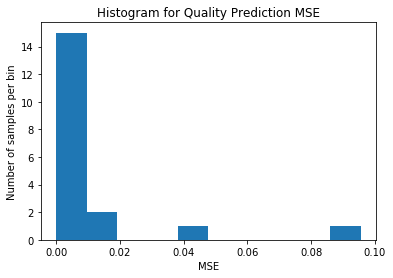

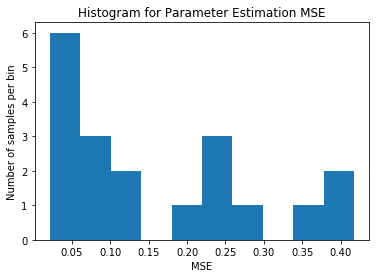

In [13]:
import statistics 

print("Quality Prediction Mean and STD, " , statistics.mean(all_results_opt), statistics.stdev(all_results_opt))
print("Parameter Estimation Mean and STD, " , statistics.mean(all_estimations_opt), statistics.stdev(all_estimations_opt))

plt.hist(all_results_opt, bins = 10)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Quality Prediction MSE")
plt.show()

plt.hist(all_estimations_opt, bins = 10)
plt.xlabel("MSE")
plt.ylabel("Number of samples per bin")
plt.title("Histogram for Parameter Estimation MSE")
plt.show()

